In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from kneed import KneeLocator

In [2]:
# Load the dataset
file_path = './Depression Dataset.csv'  # Replace with actual path
df = pd.read_csv(file_path)
print(f'Dataset Shape: {df.shape}')

Dataset Shape: (604, 31)


In [3]:
# Preprocessing: Encode categorical columns and scale features
X = df.drop(columns=['DEPRESSED'])  # Exclude target column
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = LabelEncoder().fit_transform(X[column])

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Determine optimal number of clusters using the elbow method
inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

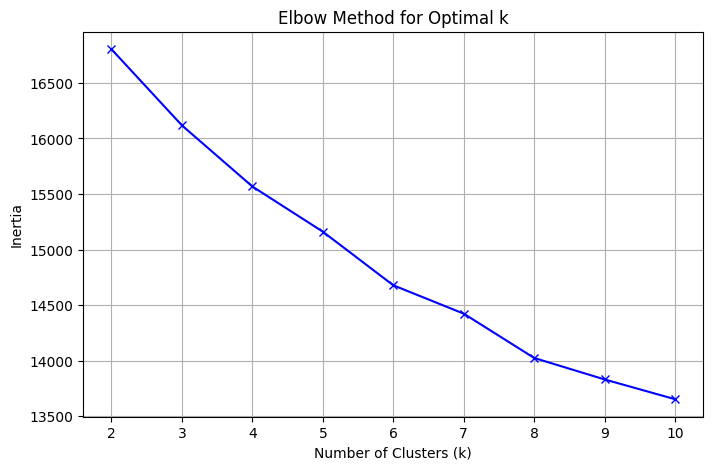

In [6]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [7]:
# Detect optimal k using KneeLocator
knee = KneeLocator(K, inertias, curve='convex', direction='decreasing')
optimal_k = knee.knee
print(f"Optimal k detected: {optimal_k}")

Optimal k detected: 8


In [8]:
# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

In [9]:
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score for k={optimal_k}: {silhouette_avg:.2f}")


Silhouette Score for k=8: 0.05


In [10]:
# Analyze cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("\nDistinctive features for each cluster:")
for i in range(len(cluster_centers)):
    print(f"\nCluster {i}:")
    sorted_features = cluster_centers.iloc[i].sort_values()
    print("Highest values:")
    print(sorted_features[-5:])
    print("\nLowest values:")
    print(sorted_features[:5])


Distinctive features for each cluster:

Cluster 0:
Highest values:
SMOKE      0.322049
ILLNESS    0.411212
LIVWTH     0.503760
EDU        0.539012
AGERNG     0.740804
Name: 0, dtype: float64

Lowest values:
PROF     -2.003193
MARSTS   -0.897953
RESDPL   -0.656814
CHEAT    -0.317243
EATDIS   -0.306719
Name: 0, dtype: float64

Cluster 1:
Highest values:
PROF      0.227427
MARSTS    0.299939
RESDPL    0.314275
ENVSAT    0.340639
GENDER    0.536006
Name: 1, dtype: float64

Lowest values:
DEPRI    -0.580617
ANXI     -0.565547
INFER    -0.457069
EATDIS   -0.433974
ABUSED   -0.356508
Name: 1, dtype: float64

Cluster 2:
Highest values:
CHEAT     0.370726
LOST      0.384493
GENDER    0.406557
SMOKE     1.504525
DRINK     3.567530
Name: 2, dtype: float64

Lowest values:
PROF      -0.296034
ILLNESS   -0.224692
ANXI      -0.175158
PHYEX     -0.144537
ENVSAT    -0.101122
Name: 2, dtype: float64

Cluster 3:
Highest values:
PROF      0.339853
ABUSED    0.355333
ANXI      0.469271
INSOM     0.472859



Contingency Table (Clusters vs Actual Labels):
DEPRESSED    0    1
Cluster            
0           20   31
1          120   72
2           10   32
3           14   54
4           39   40
5            2    9
6            2  113
7            0   46


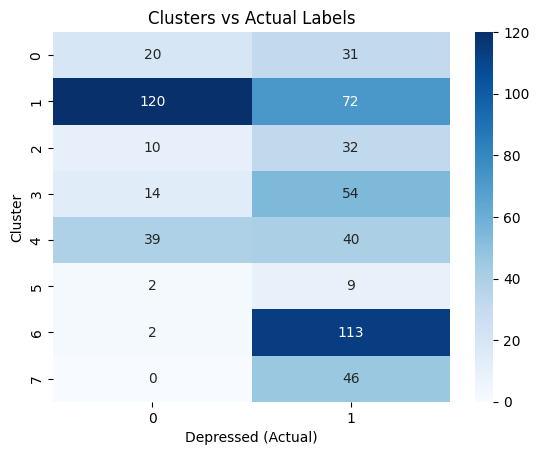

In [11]:
# Compare clusters with actual target variable
if 'DEPRESSED' in df.columns:
    contingency_table = pd.crosstab(df['Cluster'], df['DEPRESSED'])
    print("\nContingency Table (Clusters vs Actual Labels):")
    print(contingency_table)

    # Visualize contingency table as heatmap
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
    plt.title('Clusters vs Actual Labels')
    plt.ylabel('Cluster')
    plt.xlabel('Depressed (Actual)')
    plt.show()

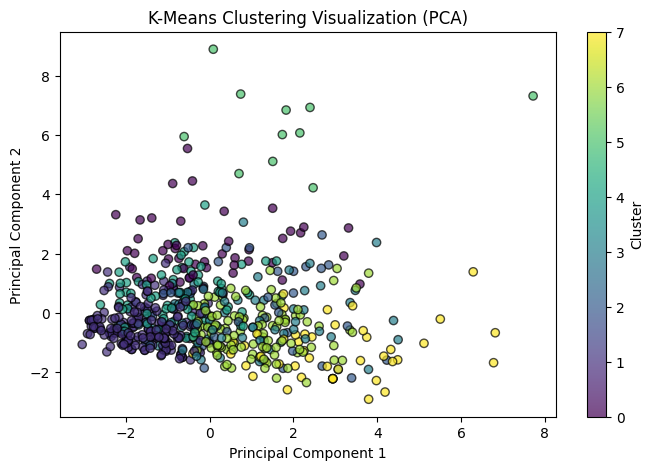

In [12]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()